# Module 13 -  Linear Regression with Least Squares

**Author: Khal Makhoul, W.P.G.Peterson**

**_Revised: Jessica Cervi_**

**Expected time = 1.5 hours**

**Total points = 60 points**
 
 
 
## Assignment Overview

This assignment will test your ability to code your own version of least squares regression in `Python`. After a brief review of some of the content from the lecture you will be asked to create a number of functions that will eventually be able to read in raw data to `Pandas` and perform a least squares regression on a subset of that data.  

This will include:  
- Calculating least squares weights
- Reading data on dist to return `Pandas` DataFrame  
- Select data by column  
- Implement column cut-offs  

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Use Pandas to subset dataframes by a range of values
- Compare columns and rows of an array in matrices  
- Transpose, multiply, and find inverse of arrays 
- Use matrix operations to code least squares 
- Evaluate Ordinary Least Squares using Root Mean Squared Error and  R squared 
- Implement Ordinary Least Squares with Sklearn
- Demonstrate understanding of the mathematical foundations behind least squares regression 
- Use linear regression to make predictions about data



## Index: 

#### Module 11: Linear Regression with Least Squares

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)



## Module 13 -  Linear Regression with Least Squares


In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression. 
As long as a few basic assumptions are fulfilled, linear regression using least squares is solvable exactly, without requiring approximation. 

This means that the equations presented in the lectures in the module can be adapted directly to `Python` code, making this a good practice for both using `Python` and translating an "algorithm" to code.

To derive the desired result, we will use the same matrix version of the least squares solution presented in the lectures. As a reminder,  the vector of weights we are trying to find, $w_{LS}$, can be computed via:

$$w_{LS} = (X^T X)^{−1}X^T y,$$

where $X$ is the matrix of inputs and $y$ is the output vector from the training set. 

In this equation, $X$ is always defined to have a vector of $1$ value(s) as its first column. In other words, even when there is only one input value for each data point, $X$ takes the form:

$$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$$

Similarly, for two inputs per data point, $X$ will take this form:
 
$$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$$

### Impoting the data set and exploratory data analysis

For this assignment, we will attempt to predict house prices using the above ground living area with a regression model on a housing price data set. More information about this dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations we'll use `matplotlib`.

Let's import the necessary libraries and load the data sets we will be using using the pandas `pd.read_csv()` function. 

In [1]:
#Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Read the data set
tr_path = './data/train.csv'
data = pd.read_csv(tr_path)

We begin by performing some basic exploratory data analysis by using the function `head()` and the attribute `columns`.

In [2]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

How many columns are in `data`? Assign the result as integer to `ans1`.

**HINT:** Use the function `len()` together with the attribute `columns`.

In [4]:
### GRADED
### YOUR ANSWER BELOW

ans1 = len(data.columns)
###
### YOUR CODE HERE
###
print(ans1)

81


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, let's plot the relationship between our variables of interest: the price for each house and the above ground living area in square feet.

We can do so by creating a scatter plot using `matplotlib`. 

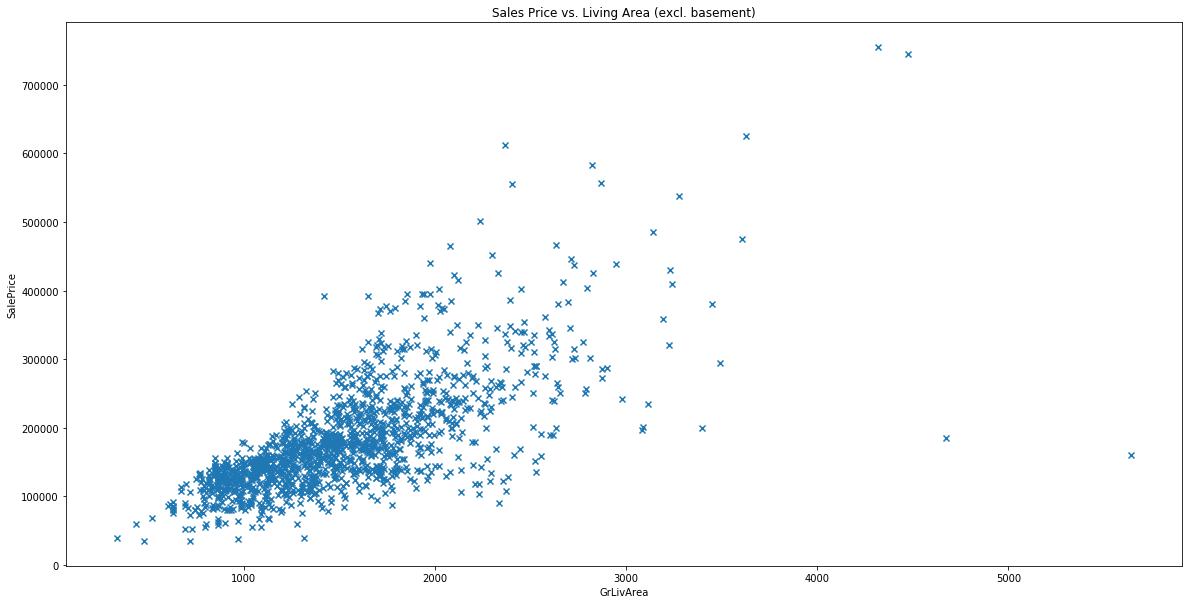

In [6]:
Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

Given the above graph, it appears there is a:  
- True: positive correlation between the variables
- False: negative correlation between the variables

Assign boolean corresponding to your choice to `ans2`.

In [7]:
### GRADED

### YOUR ANSWER BELOW

ans2 = True
###
### YOUR CODE HERE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Coding Linear Regression

Given the equation above for $w_{LS}$, we have everything we need in order to solve a linear regression. In the following questions, we will define all the necessery `Python` functions to complete step-by-step.

#### Coding function example:  Matrix inverse
Below is an example of a function that takes the inverse of a matrix. We use the `numpy` module and  the function `np.linalg.inv()`. Though simple, this can be used as a template for a few good coding practices:

* Name functions and parameters descriptively
* Use underscores _ to separate words in variable/function names (snake_case, **NOT** PascalCase or camelCase)
* In functions and classes, include a docstring between triple quotes 

In [9]:
### Create a function inverse_of_matrix that takes, as input, a matrix
### and return the inverse of that matrix.
### YOUR ANSWER BELOW

def inverse_of_matrix(mat):
    """Calculate and return the multiplicative inverse of a matrix.
    
    Positional argument:
        mat -- a square matrix to invert
    
    Example:
        sample_matrix = [[1, 2], [3, 4]]
        the_inverse = inverse_of_matrix(sample_matrix)
        
    Requirements:
        This function depends on the numpy function `numpy.linalg.inv`. 
    """
    matrix_inverse = np.linalg.inv(mat)
    return matrix_inverse


[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*5 points*

Create a function `read_to_df` that takes, as input, the file_path of a .csv file and uses the appropriate `pandas` function to read the .csv file into a dataframe `df`. Your function should return `df`.

In [10]:
### GRADED

### YOUR ANSWER BELOW

def read_to_df(file_path):
    data = pd.read_csv(file_path) 
    """Read on-disk data and return a dataframe."""
    
    return data

###
### YOUR CODE HERE
###
read_to_df('/Users/thomas/Documents/Programmierung/GitHub/MachineLearning_Emeritus/Week13/data/train.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*5 points*


Define a function called `select_columns` that takes as inputs, a dataframe `df` and a *list* of column names. Your function should return a dataframe that only has the columns specified in the list of column names.


In [12]:
### GRADED

### YOUR ANSWER BELOW

def select_columns(data_frame, column_names):
    """Return a subset of a data frame by column names.

    Positional arguments:
        data_frame -- a pandas DataFrame object
        column_names -- a list of column ndf = pd.read_csv(tr_path)

    Example:
        data = read_to_df('train.csv')
        selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
        sub_df = select_columns(data, selected_columns)
    """

    return data_frame[column_names]

###
### YOUR CODE HERE
###
testlist = ['MSSubClass','LotFrontage']
select_columns(data,testlist)

,MSSubClass,LotFrontage
0,60,65.0
1,20,80.0
2,60,68.0
3,70,60.0
4,60,84.0
...,...,...
1455,60,62.0
1456,20,85.0
1457,70,66.0
1458,20,68.0


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q6'></a>

### Question 5:

*10 points*

Create a function called `column_cutoff` that takes, as input, a `pandas` dataframe and a list of tuples.
The tuples should have the following format:`(column_name, min_value, max_value)`.
Your function should return a dataframe which excludes rows where the value in a specified column exceeds `max_value` or is less than `min_value`.

**NOTE**: DO NOT remove rows if the column value is equal to the min/max value

In [27]:
### GRADED

### YOUR ANSWER BELOW

def column_cutoff(data_frame, cutoffs):
    """Subset data frame by cutting off limits on column values.
    
    Positional arguments:
        data -- pandas DataFrame object
        cutoffs -- list of tuples in the format: 
        (column_name, min_value, max_value)
        
    Example:
        data_frame = read_into_data_frame('train.csv')
        # Remove data points with SalePrice < $50,000
        # Remove data points with GrLiveAre > 4,000 square feet
        cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
        selected_data = column_cutoff(data_frame, cutoffs)
    """
    df_limited = data_frame
    for row in df_limited.iterrows():
        sale_price = row[1][0]
        #print(row[1][0])

        GrLivArea = row[1][1]
        #print(row[1][1])
        
        YearBuilt = row[1][2]
        #print(row[1][2])

        sale_price_min = cutoffs[0][1]
        #print(cutoffs[0][1])
        
        sale_price_max = cutoffs[0][2]
        #print(cutoffs[0][2])
        
        i = row[0]

        if sale_price_max<sale_price<sale_price_min:
            df_limited.drop(labels = i)

        return df_limited

###
### YOUR CODE HERE
###
testtubles = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
selected_data = column_cutoff(df_sub,testtubles)
#selected_data.head()
df_sub.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In the next question, you will calculate $w_{LS}$ by using the inverse matrix function.  

$$w_{LS} = (X^T X)^{−1}X^T y,$$

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*10 points*

Create a function  called `least_squares_weights` that takes, as input, two matricies corresponding to the `X` inputs and `y` targets (assume the matricies are of the correct dimensions), respectively. Your function should execute the following steps:

- 1) Ensure that the number of rows of each matrix is greater than or equal to the number of columns. If not, transpose the matricies. In particular, the y input should end up as a $n\times1$ matrix, and the x input as a $n\times p$ matrix

- 2) Prepend an $n \times 1$ column of ones to the x input matrix

- 3) Use the above equation to calculate the least squares weight and return this vector.

*Note*: Use the functions `.shape`, `np.matmul`, `np.linalg.inv`, `np.ones` and `np.transpose`.

In [16]:
### GRADED


### YOUR ANSWER BELOW


def least_squares_weights(input_x, target_y):
    """Calculate linear regression least squares weights.
    
    Positional arguments:
        input_x -- matrix of training input data
        target_y -- vector of training output values
        
        The dimensions of X and y will be either p-by-n and 1-by-n
        Or n-by-p and n-by-1
        
    Example:
        import numpy as np
        training_y = np.array([[208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000]])
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        weights = least_squares_weights(training_x, training_y)
        
        print(weights)  #--> np.array([[-2.29223802e+06],
                           [ 5.92536529e+01],
                           [ 1.20780450e+03]])
                           
        print(weights[1][0]) #--> 59.25365290008861
        
    Assumptions:
        -- target_y is a vector whose length is the same as the
        number of observations in training_x
    """
    

    return ' '

###
### YOUR CODE HERE
###


In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Testing on Real Data

Now that we have code to read the data and perform matrix operations, we can put it all together to perform linear regression on a data set of our choosing.  

If your functions above are defined correctly, the following two cells should run without error.

In [18]:
def column_cutoff(data_frame, cutoffs):
    data_subset = data_frame
    for column_limits in cutoffs:
        data_subset = data_subset.loc[data_subset[column_limits[0]] >= column_limits[1],:]
        data_subset = data_subset.loc[data_subset[column_limits[0]] <= column_limits[2],:]
    return data_subset
def least_square_weights(input_x, target_y):
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)
        
        
    ones = np.ones((len(target_y), 1), dtype=int)
    
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x), 
                                                        augmented_x)),
                                np.transpose(augmented_x))
    w_ls = np.matmul(left_multiplier, target_y)   
    
    return w_ls

In [19]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

Great! We have just obtained the vector of weights for our model.

In the cell below, we plot the the price for each house vs the above ground living area in square feet and the line of least squares we have just obtained with our code.

In [20]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

IndexError: string index out of range

### Calculating root mean square error (RMSE)

Finally we want to check the RMSE.

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.


In [21]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)

IndexError: string index out of range

[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*5 points*

Decide whether the following statement is True or False:

*The Root Mean Square Error is a quantity expressed in the same units as the data*

Assign boolean response to the variable `ans7`.

In [22]:
### GRADED

### YOUR ANSWER BELOW

ans7 = True
###
### YOUR CODE HERE
###


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### sklearn implementation of linear regression with least squares

While it is useful to build and program our model from scratch, this course will also introduce how to use conventional methods to fit each model. Linear regression with least squares in conveniently implemented in the  `scikit-learn` module (also called `sklearn`).  



In the next question, we will ask you to implement KNN in `sklearn`. You can find all the information you need [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*15 points*

Use the function `LinearRegression` from `sklearn` to instantiate the classifier `lr`.

Define a 2-dimensional array `skl_X` from the feature `GrLivArea` in df_sub_cutoff and a 1-dimensional array `skl_y` from the feature `SalaPrice` in df_sub_cutoff .

Use the function `fit()` to fit `skl_X` and `skl_y` to the classifier.

In [33]:
### GRADED

from sklearn.linear_model import LinearRegression

### YOUR ANSWER BELOW

skl_X = df['GrLivArea']
skl_X.insert(loc=0, column='Numers', value=np.arange(len(skl_X)))
skl_Y = df['SalePrice']
###
### YOUR CODE HERE
###
skl_X.shape

AttributeError: 'Series' object has no attribute 'insert'

In [25]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Oberve and run the code below to see how close your answers are!

In [26]:
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

NameError: name 'lr' is not defined